# Convolutional Neural Networks

**1. Classic MNIST**

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


Define the hyperparameters and data constants

In [2]:
learning_rate = .01
batch_size = 64
hidden_size = 128
epochs = 10
conv_kernel_size = (4, 4)
pool_size = (3, 3)
filters_first = 32
filters_second = 16
dropout_first = .2
dropout_second = .3
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

Load and reshape the data using keras

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Normalize the data to grayscale in range [0,1] rather than [0,255] (type errors without conversion)

In [13]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255

One-hot encode the labels

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes, dtype='float64')
y_test = keras.utils.to_categorical(y_test, num_classes, dtype='float64')

Define the model

In [23]:
model = Sequential()
model.add(Conv2D(
    filters=filters_first, 
    kernel_size=conv_kernel_size,
    activation='relu',
    input_shape=input_shape
))
model.add(Conv2D(filters_second, conv_kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(rate=dropout_first))
model.add(Flatten())
model.add(Dense(units=hidden_size, activation='relu'))
model.add(Dropout(dropout_second))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

Train and evaluate the model

In [24]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1851 - accuracy: 0.9445 - val_loss: 0.0612 - val_accuracy: 0.9802
Epoch 2/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1120 - accuracy: 0.9674 - val_loss: 0.0679 - val_accuracy: 0.9801
Epoch 3/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1125 - accuracy: 0.9684 - val_loss: 0.0496 - val_accuracy: 0.9845
Epoch 4/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1026 - accuracy: 0.9710 - val_loss: 0.0679 - val_accuracy: 0.9830
Epoch 5/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1043 - accuracy: 0.9712 - val_loss: 0.0446 - val_accuracy: 0.9849
Epoch 6/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0994 - accuracy: 0.9730 - val_loss: 0.0469 - val_accuracy: 0.9859
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/st

Get the incorrectly predicted samples, argmax used to obtain predicted class

In [2]:
import numpy as np

In [48]:
predicted = model.predict(X_test)
predicted_classes = np.array([np.argmax(p) for p in predicted])
true_classes = np.array([np.argmax(y) for y in y_test])

In [54]:
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

In [55]:
len(incorrect_indices)

146

In [58]:
(10000 - len(incorrect_indices) )/ 10000

0.9854

The accuracy matches training report, so the incorrect examples have been correctly identified

Plot some of the incorrect examples

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

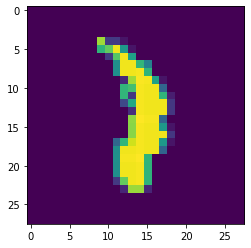

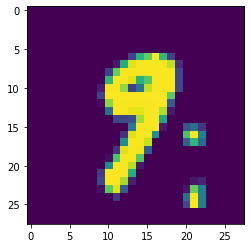

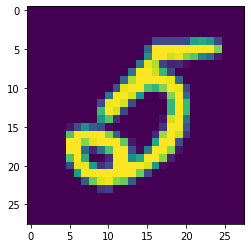

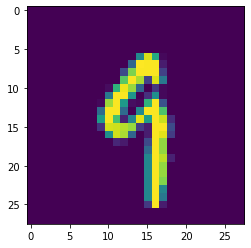

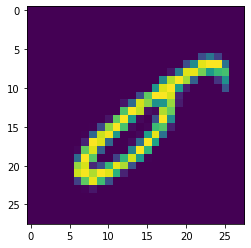

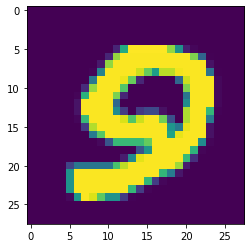

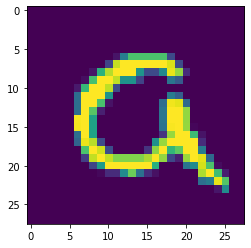

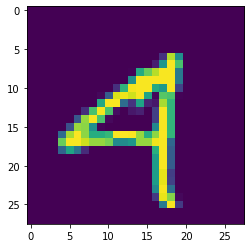

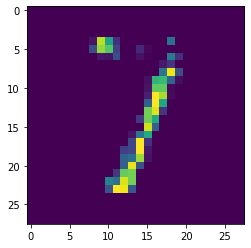

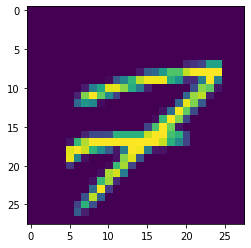

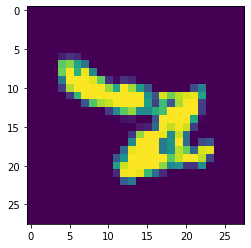

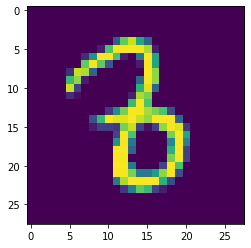

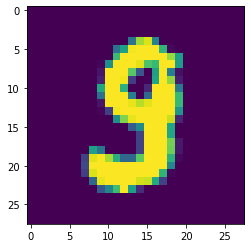

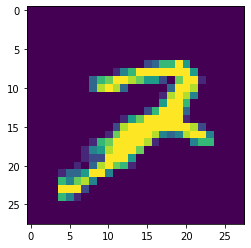

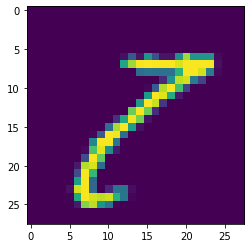

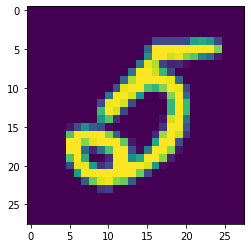

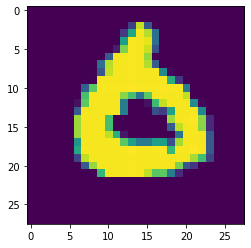

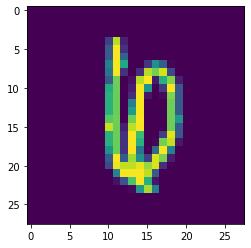

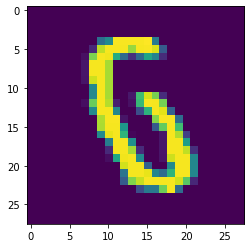

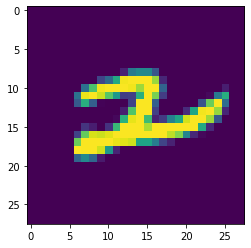

In [82]:
indices = np.random.choice(incorrect_indices, 20)
for indice in indices:
    plt.figure()
    plt.imshow(np.reshape(X_test[indice], (28,28)))

**Dogs vs cats (https://www.kaggle.com/c/dogs-vs-cats/data)**

Load the data and obtain class labels, dog is 1, cat is 0

In [11]:
import pandas as pd
import os
import cv2

In [12]:
path = 'data/cats-dogs-data/'

In [26]:
X = []
y = []
convert = lambda category : float(category == 'dog')

In [30]:
img_size = (90, 90)
for file in os.listdir(path):
    category: str = file.split(".")[0]
    category: float = convert(category)
    img: np.array = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
# resize the images using interpolation, to make all of them same sized
    new_img: np.array = cv2.resize(img, dsize=img_size)
    X.append(new_img)
    y.append(category)

Reshape and normalize the training data to conform to Conv layer requirements

In [35]:
X = (np.array(X, dtype='float64') / 255).reshape(-1, img_size[0], img_size[1], 1)
y = np.array(y)

In [38]:
y[235]

0.0

Define the model and hyperparameters

In [42]:
learning_rate = .01
batch_size = 64
hidden_size = 128
epochs = 10
conv_kernel_size = (4, 4)
pool_size = (3, 3)
filters_first = 32
filters_second = 16
dropout_first = .2
dropout_second = .3
# input image dimensions
img_rows, img_cols = 90, 90
input_shape = (img_rows, img_cols, 1)

validation_split = .2

In [45]:
model = Sequential()
model.add(Conv2D(
    filters=filters_first, 
    kernel_size=conv_kernel_size,
    activation='relu',
    input_shape=input_shape
))
model.add(Conv2D(filters_second, conv_kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(rate=dropout_first))
model.add(Flatten())
model.add(Dense(units=hidden_size, activation='relu'))
model.add(Dropout(dropout_second))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Train the model

In [46]:
model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 433s 22ms/step - loss: 0.6762 - accuracy: 0.5734 - val_loss: 0.6345 - val_accuracy: 0.6778
Epoch 2/10
20000/20000 [==============================] - 422s 21ms/step - loss: 0.5839 - accuracy: 0.6941 - val_loss: 0.5603 - val_accuracy: 0.7106
Epoch 3/10
20000/20000 [==============================] - 411s 21ms/step - loss: 0.5196 - accuracy: 0.7443 - val_loss: 0.5552 - val_accuracy: 0.7102
Epoch 4/10
20000/20000 [==============================] - 408s 20ms/step - loss: 0.4675 - accuracy: 0.7763 - val_loss: 0.4792 - val_accuracy: 0.7660
Epoch 5/10
20000/20000 [==============================] - 579s 29ms/step - loss: 0.4240 - accuracy: 0.8059 - val_loss: 0.5049 - val_accuracy: 0.7534
Epoch 6/10
20000/20000 [==============================] - 758s 38ms/step - loss: 0.3790 - accuracy: 0.8337 - val_loss: 0.4697 - val_accuracy: 0.7834
Epoch 7/10
20000/20000 [==============================] -

Best recorded accuracy is 0.7864, which is much better than guessing at 0.5, but still far from the state-of-the-art